In [1]:
import os
import json
import gzip
import pandas as pd
import numpy as np
import math

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)
pd.set_option('max_colwidth', 50)

In [3]:
df = pd.read_excel(r"C:\Users\surya\Desktop\Jupyter Python Programs\Amazon Review NLP\LIWC_Cell_Phone_Reviews.xlsx")

In [4]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,description,feature,rank,main_cat,imageURL,imageURLHighRes,no_of_sent,no_of_words,no_of_unique_words,rank_no,sub_cat_1,sub_cat_2,sub_cat_3,sub_cat_rank,WC,Analytic,Authentic,Tone,WPS,BigWords,Dic,Cognition,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,time,focuspast,focuspresent,focusfuture
0,1,False,"09 21, 2004",A5JLAU2ARJ0BO,B0000E3GWH,NaN,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,2,NaN,"[""Compatible with T-Mobile cellular service, S...",[],"['>#3,059,436 in Cell Phones & Accessories (Se...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,5.0,40.0,31.0,3059436.0,Carrier Cell Phones,NaN,NaN,4085.0,64.0,52.84,3.08,20.23,12.80,17.19,82.81,3.13,10.94,4.69,4.69,3.13,0.00,1.56,0.00,0.00,10.94,0.00
1,4,False,"07 24, 2004",A1ACM1CBGORBN1,B0000E3GWH,NaN,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,15,NaN,"[""Compatible with T-Mobile cellular service, S...",[],"['>#3,059,436 in Cell Phones & Accessories (Se...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,18.0,184.0,134.0,3059436.0,Carrier Cell Phones,NaN,NaN,4085.0,410.0,19.19,17.29,58.42,17.08,14.88,90.73,13.66,4.39,3.41,0.98,0.98,0.49,0.49,4.39,2.20,9.02,2.20
2,3,False,"07 6, 2004",A2V48Q03FZUOSD,B0000E3GWH,NaN,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,11,NaN,"[""Compatible with T-Mobile cellular service, S...",[],"['>#3,059,436 in Cell Phones & Accessories (Se...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,9.0,121.0,90.0,3059436.0,Carrier Cell Phones,NaN,NaN,4085.0,299.0,52.55,26.84,16.42,33.22,12.71,90.64,13.71,5.02,2.34,2.68,2.68,1.00,1.67,2.01,3.01,8.70,0.00
3,5,True,"04 12, 2004",A1V3TRGWOMA8LC,B0000E3GWH,NaN,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,4,NaN,"[""Compatible with T-Mobile cellular service, S...",[],"['>#3,059,436 in Cell Phones & Accessories (Se...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,4.0,27.0,26.0,3059436.0,Carrier Cell Phones,NaN,NaN,4085.0,55.0,29.57,74.91,98.85,13.75,18.18,87.27,12.73,7.27,7.27,0.00,0.00,0.00,0.00,1.82,1.82,7.27,3.64
4,3,False,"02 19, 2004",A3NOBH42C7UI5M,B0000E3GWH,NaN,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,12,NaN,"[""Compatible with T-Mobile cellular service, S...",[],"['>#3,059,436 in Cell Phones & Accessories (Se...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,30.0,222.0,160.0,3059436.0,Carrier Cell Phones,NaN,NaN,4085.0,494.0,49.88,59.41,41.09,15.94,11.94,89.88,13.56,3.04,2.23,0.81,1.62,0.81,0.81,5.26,3.85,6.07,0.81


In [5]:
df['vote'].value_counts()

0                                                                                                                                                                                                                 43075
2                                                                                                                                                                                                                  3144
3                                                                                                                                                                                                                  1670
4                                                                                                                                                                                                                  1055
5                                                                                                                                       

In [6]:
df[df['vote'] == "['https://images-na.ssl-images-amazon.com/images/I/41LC3OoO6lL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/516Nx7%2BlydL.jpg', 'https://images-na.ssl-images-amazon.com/images/I/41XUeT1ilcL.jpg']"]

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,description,feature,rank,main_cat,imageURL,imageURLHighRes,no_of_sent,no_of_words,no_of_unique_words,rank_no,sub_cat_1,sub_cat_2,sub_cat_3,sub_cat_rank,WC,Analytic,Authentic,Tone,WPS,BigWords,Dic,Cognition,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,time,focuspast,focuspresent,focusfuture
43213,"he """"top""","One year after released, finally the dream pho...",1341619200,273,['https://images-na.ssl-images-amazon.com/imag...,"[""The Nokia 808 PureView is equipped with a 41...","['2G: GSM 850 / 900 / 1800 / 1900, 3G: HSDPA 8...","['>#1,810,242 in Cell Phones & Accessories (Se...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,260,3181,1422,1810242,Unlocked Cell Phones,NaN,NaN,17117.0,1.0,5398.0,79.47,32.06,37.95,44.67,20.76,77.84,59.04,7.73,3.69,0.82,0.2,1.96,0.7,0.02,0.09,0.02,7.48,3.91,0.69,0.04,0.0,35.31,5.0


In [7]:
df.drop(43213, inplace=True) # dropping this row as its vote value does not make sense

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
#liwc_col = df.loc[:,'WC':'focusfuture']
liwc_col = list(df.columns)[26:]
liwc_col

['WC',
 'Analytic',
 'Authentic',
 'Tone',
 'WPS',
 'BigWords',
 'Dic',
 'Cognition',
 'Affect',
 'tone_pos',
 'tone_neg',
 'emotion',
 'emo_pos',
 'emo_neg',
 'time',
 'focuspast',
 'focuspresent',
 'focusfuture']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53629 entries, 0 to 53628
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   overall             53628 non-null  object 
 1   verified            53628 non-null  object 
 2   reviewTime          53628 non-null  object 
 3   reviewerID          53628 non-null  object 
 4   asin                53628 non-null  object 
 5   style               24218 non-null  object 
 6   reviewerName        53620 non-null  object 
 7   reviewText          53628 non-null  object 
 8   summary             53610 non-null  object 
 9   unixReviewTime      53627 non-null  object 
 10  vote                53627 non-null  object 
 11  image               531 non-null    object 
 12  description         53627 non-null  object 
 13  feature             53627 non-null  object 
 14  rank                53627 non-null  object 
 15  main_cat            53627 non-null  object 
 16  imag

In [11]:
#df['vote'] = df['vote'].votestype(int)
df["vote"] = pd.to_numeric(df["vote"])

In [12]:
for i in liwc_col:
    print(i, '-----  ', df['vote'].corr(df[i]))

WC -----   0.3725556892017102
Analytic -----   0.004849032386685179
Authentic -----   0.05388263376982883
Tone -----   -0.037928175551648485
WPS -----   0.08050925486360284
BigWords -----   -0.0317765050891904
Dic -----   0.00824087126979617
Cognition -----   0.02957608849891234
Affect -----   -0.06189633604433518
tone_pos -----   -0.06139721477172279
tone_neg -----   -0.0022076105460934023
emotion -----   -0.046492165514968105
emo_pos -----   -0.04650489656708508
emo_neg -----   -0.0020879306537262524
time -----   0.024198493391217962
focuspast -----   0.00026878868405232417
focuspresent -----   0.021960603991284623
focusfuture -----   0.013429405897521547


### Replacing 0.0 with a small number 0.00001 in the votes col because we have take log later and log0 is not defined. 

In [13]:
df['vote'].max()

1737.0

In [14]:
df['vote'].min()

0.0

In [15]:
df[df['vote'] == 0.0]

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,description,feature,rank,main_cat,imageURL,imageURLHighRes,no_of_sent,no_of_words,no_of_unique_words,rank_no,sub_cat_1,sub_cat_2,sub_cat_3,sub_cat_rank,WC,Analytic,Authentic,Tone,WPS,BigWords,Dic,Cognition,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,time,focuspast,focuspresent,focusfuture
14,4,False,"08 19, 2005",A1CMPO57CHP95A,B0000SX2U2,NaN,D. West,O.k. so you want a treo 600? I have had mine f...,Facts about the treo 600!,1124409600,0.0,NaN,[],[],"['>#5,713,484 in Cell Phones & Accessories (Se...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,11.0,56.0,49.0,5713484.0,Carrier Cell Phones,NaN,NaN,5300.0,121.0,26.63,62.23,72.05,17.29,6.61,90.08,12.40,3.31,3.31,0.00,1.65,1.65,0.00,1.65,3.31,7.44,4.96
16,1,False,"12 21, 2005",AJMBX04BZWPSD,B0000SX3BK,NaN,K. Horn,I had been very happy with my Motorola phone u...,Just hope your phone never quits working,1135123200,0.0,NaN,"['used,good,with charger,one of the first in a...","[""The Motorola i730's advanced features, inclu...","['>#1,254,799 in Cell Phones & Accessories (Se...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,7.0,75.0,57.0,1254799.0,Unlocked Cell Phones,NaN,NaN,13220.0,162.0,81.08,69.87,28.48,23.14,16.67,92.59,12.35,5.56,3.09,2.47,1.23,1.23,0.00,6.79,9.26,3.09,0.62
24,2,False,"09 23, 2005",A2562B4ZRLW2HB,B00023DS04,NaN,Maxway,MY PHONE IS A CANDY RED GETS LOTS OF ATTENTION...,VERY ATTRACTIVE THATS ALL,1127433600,0.0,NaN,"['item 33', 'Compatible with Sprint cell phone...",[],"['>#2,245,317 in Cell Phones & Accessories (Se...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,2.0,29.0,24.0,2245317.0,Carrier Cell Phones,NaN,NaN,3563.0,68.0,3.97,76.27,66.58,34.00,4.41,89.71,17.65,2.94,2.94,0.00,0.00,0.00,0.00,2.94,0.00,4.41,4.41
28,5,True,"04 23, 2016",AZ0RCGPDO5K4R,B00023DS04,NaN,COOKIE WALTON,"Very Good and works well, will do business again",Five Stars,1461369600,0.0,NaN,"['item 33', 'Compatible with Sprint cell phone...",[],"['>#2,245,317 in Cell Phones & Accessories (Se...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,1.0,4.0,4.0,2245317.0,Carrier Cell Phones,NaN,NaN,3563.0,9.0,1.00,10.18,99.00,9.00,11.11,100.00,0.00,22.22,22.22,0.00,11.11,11.11,0.00,11.11,0.00,11.11,22.22
52,1,False,"08 30, 2008",A1FML2Z3CAXJBC,B0006852GS,NaN,T. Hicks,I would not recommend this phone. I bought mi...,Cannot Recommend 7290,1220054400,0.0,NaN,['This update to the tried and true BlackBerry...,[],"['>#3,517,527 in Cell Phones & Accessories (Se...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,9.0,54.0,52.0,3517527.0,Unlocked Cell Phones,NaN,NaN,24858.0,107.0,30.29,86.90,77.95,11.89,15.89,86.92,17.76,3.74,3.74,0.00,0.93,0.93,0.00,4.67,3.74,7.48,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53619,5,False,"10 16, 2016",A233H7F8EJIX1F,B00ONSC81E,NaN,Joel Moreno,One of the best phones ever built on earth! An...,Sony Xperia still surprises us!,1476576000,0.0,NaN,"[""Dont settle for good. Demand great. It's the...","['Waterproof, dust-tight design - dont let the...","['>#895,890 in Cell Phones & Accessories (See ...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,14.0,113.0,78.0,895890.0,Unlocked Cell Phones,NaN,NaN,10447.0,198.0,52.74,43.16,67.94,14.14,19.19,80.81,9.60,3.54,3.03,0.00,2.02,1.52,0.00,9.09,5.05,7.07,1.01
53620,5,True,"12 25, 2015",A10WMKOL27VEI,B00ONSC81E,NaN,Keith,R

In [16]:
df['vote'].replace(0.0, 0.1, inplace=True)

In [17]:
df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,description,feature,rank,main_cat,imageURL,imageURLHighRes,no_of_sent,no_of_words,no_of_unique_words,rank_no,sub_cat_1,sub_cat_2,sub_cat_3,sub_cat_rank,WC,Analytic,Authentic,Tone,WPS,BigWords,Dic,Cognition,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,time,focuspast,focuspresent,focusfuture
0,1,False,"09 21, 2004",A5JLAU2ARJ0BO,B0000E3GWH,NaN,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,1095724800,2.0,NaN,"[""Compatible with T-Mobile cellular service, S...",[],"['>#3,059,436 in Cell Phones & Accessories (Se...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,5.0,40.0,31.0,3059436.0,Carrier Cell Phones,NaN,NaN,4085.0,64.0,52.84,3.08,20.23,12.80,17.19,82.81,3.13,10.94,4.69,4.69,3.13,0.00,1.56,0.00,0.00,10.94,0.00
1,4,False,"07 24, 2004",A1ACM1CBGORBN1,B0000E3GWH,NaN,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,1090627200,15.0,NaN,"[""Compatible with T-Mobile cellular service, S...",[],"['>#3,059,436 in Cell Phones & Accessories (Se...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,18.0,184.0,134.0,3059436.0,Carrier Cell Phones,NaN,NaN,4085.0,410.0,19.19,17.29,58.42,17.08,14.88,90.73,13.66,4.39,3.41,0.98,0.98,0.49,0.49,4.39,2.20,9.02,2.20
2,3,False,"07 6, 2004",A2V48Q03FZUOSD,B0000E3GWH,NaN,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,1089072000,11.0,NaN,"[""Compatible with T-Mobile cellular service, S...",[],"['>#3,059,436 in Cell Phones & Accessories (Se...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,9.0,121.0,90.0,3059436.0,Carrier Cell Phones,NaN,NaN,4085.0,299.0,52.55,26.84,16.42,33.22,12.71,90.64,13.71,5.02,2.34,2.68,2.68,1.00,1.67,2.01,3.01,8.70,0.00
3,5,True,"04 12, 2004",A1V3TRGWOMA8LC,B0000E3GWH,NaN,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,1081728000,4.0,NaN,"[""Compatible with T-Mobile cellular service, S...",[],"['>#3,059,436 in Cell Phones & Accessories (Se...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,4.0,27.0,26.0,3059436.0,Carrier Cell Phones,NaN,NaN,4085.0,55.0,29.57,74.91,98.85,13.75,18.18,87.27,12.73,7.27,7.27,0.00,0.00,0.00,0.00,1.82,1.82,7.27,3.64
4,3,False,"02 19, 2004",A3NOBH42C7UI5M,B0000E3GWH,NaN,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,1077148800,12.0,NaN,"[""Compatible with T-Mobile cellular service, S...",[],"['>#3,059,436 in Cell Phones & Accessories (Se...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,30.0,222.0,160.0,3059436.0,Carrier Cell Phones,NaN,NaN,4085.0,494.0,49.88,59.41,41.09,15.94,11.94,89.88,13.56,3.04,2.23,0.81,1.62,0.81,0.81,5.26,3.85,6.07,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53624,1,True,"01 15, 2018",A13L832YDDGU9G,B00PDML6U8,NaN,Terri W,The phone was stolen could not activate at all...,Stolen metro PC's phone,1515974400,0.1,NaN,"[""The Galaxy LightTM will give you more ways t...","['Android 4.2.2 system (Jelly Bean), Fast 1.4G...","['>#657,463 in Cell Phones & Accessories (See ...",Cell Phones & Accessories,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,3.0,8.0,7.0,657463.0,Carrier Cell Phones,NaN,NaN,1756.0,20.0,39.70,63.35,90.50,6.67,10.00,100.00,30.00,5.00,5.00,0.00,5.00,5.00,0.00,0.00,25.00,10.00,0.0

In [18]:
np.log10(0.00000000000000000000000000000000000000000001)

-44.0

In [19]:
np.log10(0.1)

-1.0

In [20]:
df['votelogten'] = np.log10(df['vote'])

In [21]:
df['voteloge'] = np.log(df['vote'])

In [22]:
print('LIWC feature', '-----  ', 'vote corr', '   ', 'vote log base 10', '   ', 'vote log base e', '\n')
for i in liwc_col:
    print(i, '-----  ', df['vote'].corr(df[i]), '   ', df['votelogten'].corr(df[i]), '   ', df['voteloge'].corr(df[i]))

LIWC feature -----   vote corr     vote log base 10     vote log base e 

WC -----   0.3720041639414918     0.5021043407719202     0.5021043407719198
Analytic -----   0.004963671543478712     -0.0556039475028501     -0.05560394750285007
Authentic -----   0.0535674261493945     0.19711004135857127     0.19711004135857102
Tone -----   -0.03778855034631183     -0.09675725905793582     -0.09675725905793571
WPS -----   0.08011669557921738     0.25722754006996756     0.25722754006996706
BigWords -----   -0.031568967198304     -0.12689966369812009     -0.12689966369812017
Dic -----   0.008154000950542676     0.0489209854863919     0.04892098548639176
Cognition -----   0.029393879204675448     0.11278105983503296     0.11278105983503268
Affect -----   -0.06155353363096579     -0.21693798395658068     -0.21693798395658004
tone_pos -----   -0.06105323898921986     -0.21711223782609315     -0.2171122378260932
tone_neg -----   -0.0022195224346691204     0.003995040477240659     0.00399504047724059

In [23]:
df['vote'].describe(),df['votelogten'].describe(),df['voteloge'].describe()

(count    53627.000000
 mean         2.914418
 std         23.749558
 min          0.100000
 25%          0.100000
 50%          0.100000
 75%          0.100000
 max       1737.000000
 Name: vote, dtype: float64,
 count    53627.000000
 mean        -0.660140
 std          0.717563
 min         -1.000000
 25%         -1.000000
 50%         -1.000000
 75%         -1.000000
 max          3.239800
 Name: votelogten, dtype: float64,
 count    53627.000000
 mean        -1.520028
 std          1.652251
 min         -2.302585
 25%         -2.302585
 50%         -2.302585
 75%         -2.302585
 max          7.459915
 Name: voteloge, dtype: float64)

In [24]:
rows = list(df.index)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

## Linear Regression

In [26]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

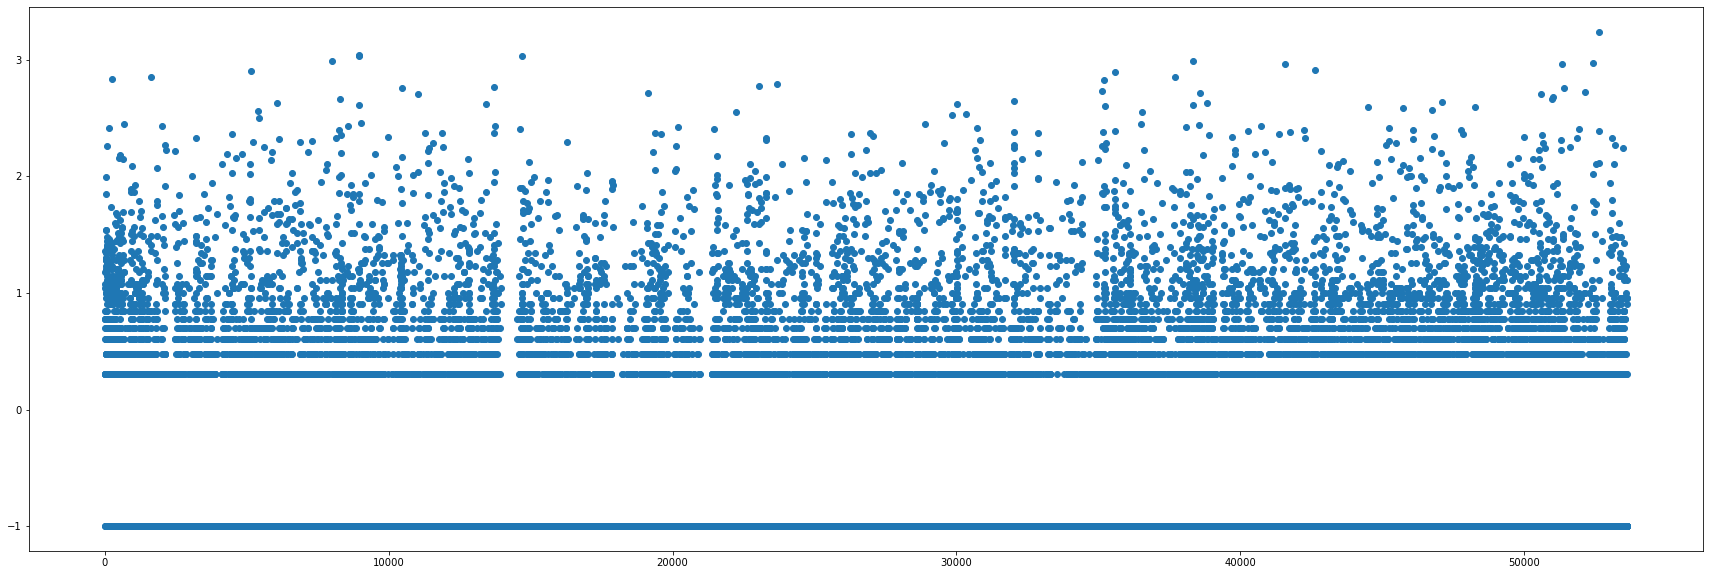

In [27]:
plt.figure(figsize = (30,10))
plt.scatter(rows, df['votelogten'])
plt.show()

### 2 rows have NaN values in LIWC columns

In [28]:
df[df['WC'].isna() == True]

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,description,feature,rank,main_cat,imageURL,imageURLHighRes,no_of_sent,no_of_words,no_of_unique_words,rank_no,sub_cat_1,sub_cat_2,sub_cat_3,sub_cat_rank,WC,Analytic,Authentic,Tone,WPS,BigWords,Dic,Cognition,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,time,focuspast,focuspresent,focusfuture,votelogten,voteloge
43211,5,True,"07 7, 2012",AU5V90NU1ON6O,B00WXI1LQ4,{'Color:': ' White'},Tor Slettnes,This phone seemed nothing short of a dream com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df.drop([43211,43212], inplace=True)
df.reset_index(drop=True, inplace=True)

In [30]:
X = df[df.columns[26:-2]]
y = df['votelogten'].astype(np.float64)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [33]:
regressor.fit(X_train, y_train)     # training our model using X and y train data

LinearRegression()

In [34]:
"""plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()"""

"plt.scatter(X_train, y_train, color = 'blue')\nplt.plot(X_train, regressor.predict(X_train), color = 'red')\nplt.title('Salary vs Experience (Training set)')\nplt.xlabel('Years of Experience')\nplt.ylabel('Salary')\nplt.show()"

In [35]:
y_pred = regressor.predict(X_test)      # testing our model using X test data
y_pred

array([-0.94284784, -0.78191754, -0.94284784, ..., -0.39327274,
        0.04060408, -0.78241819])

In [36]:
y_test

1180    -1.000000
30994   -1.000000
9878    -1.000000
9747    -1.000000
39024    0.903090
           ...   
13466   -1.000000
31260   -1.000000
20485   -1.000000
38843    1.380211
10905   -1.000000
Name: votelogten, Length: 10726, dtype: float64

In [37]:
regressor.score(X_test, y_test)

0.2733034091707862

In [38]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.2733034091707862